In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

!pip install docx2txt
!pip install chart_studio

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import docx2txt
from nltk.tokenize import WhitespaceTokenizer

import plotly.graph_objects as go
import plotly.express as px

import chart_studio.plotly as py

warnings.filterwarnings('ignore')


In [8]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\Resume screener\\Resume screener\\ResumeDataset\\UpdatedResumeDataSet.csv", encoding='utf-8')
df.head()

Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...

# EDA

In [10]:
df.describe()

Category                                             Resume
count              962                                                962
unique              25                                                166
top     Java Developer  Technical Skills Web Technologies: Angular JS,...
freq                84                                                 18

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [12]:
df.shape

(962, 2)

In [13]:
df.dtypes

Category    object
Resume      object
dtype: object

In [14]:
df[df.isna().any(axis=1) | df.isnull().any(axis=1)]

Empty DataFrame
Columns: [Category, Resume]
Index: []

In [15]:
df.nunique()

Category     25
Resume      166
dtype: int64

In [16]:
df['length'] = df['Resume'].str.len()
df['length'].describe()

count      962.000000
mean      3160.364865
std       2886.528521
min        142.000000
25%       1217.250000
50%       2355.000000
75%       4073.750000
max      14816.000000
Name: length, dtype: float64

Text(0.5, 1.0, 'Resume length distribution')

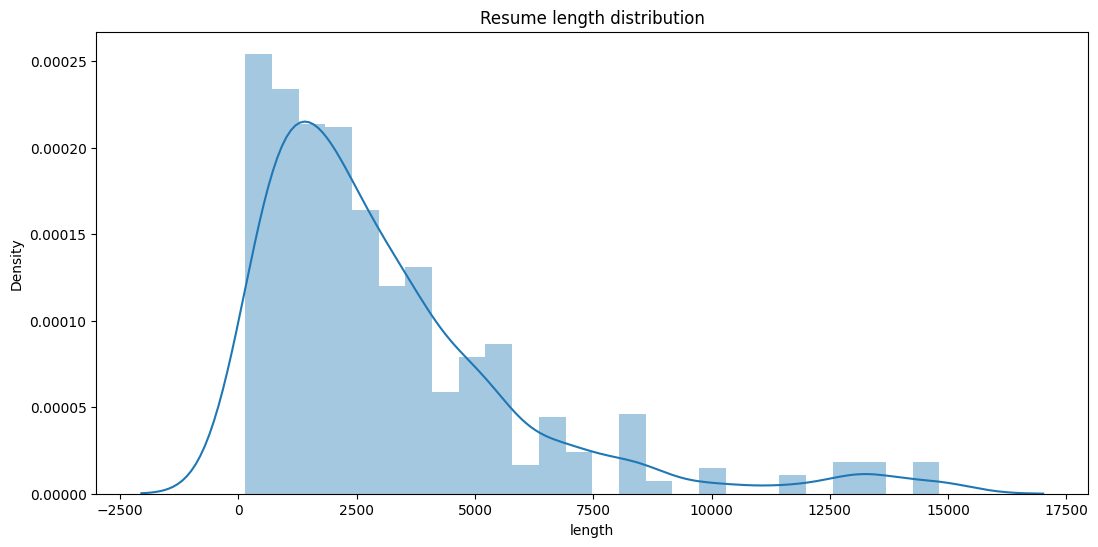

In [17]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['length']).set_title('Resume length distribution')

### Visualizing of number of words in each category of resume using boxplot

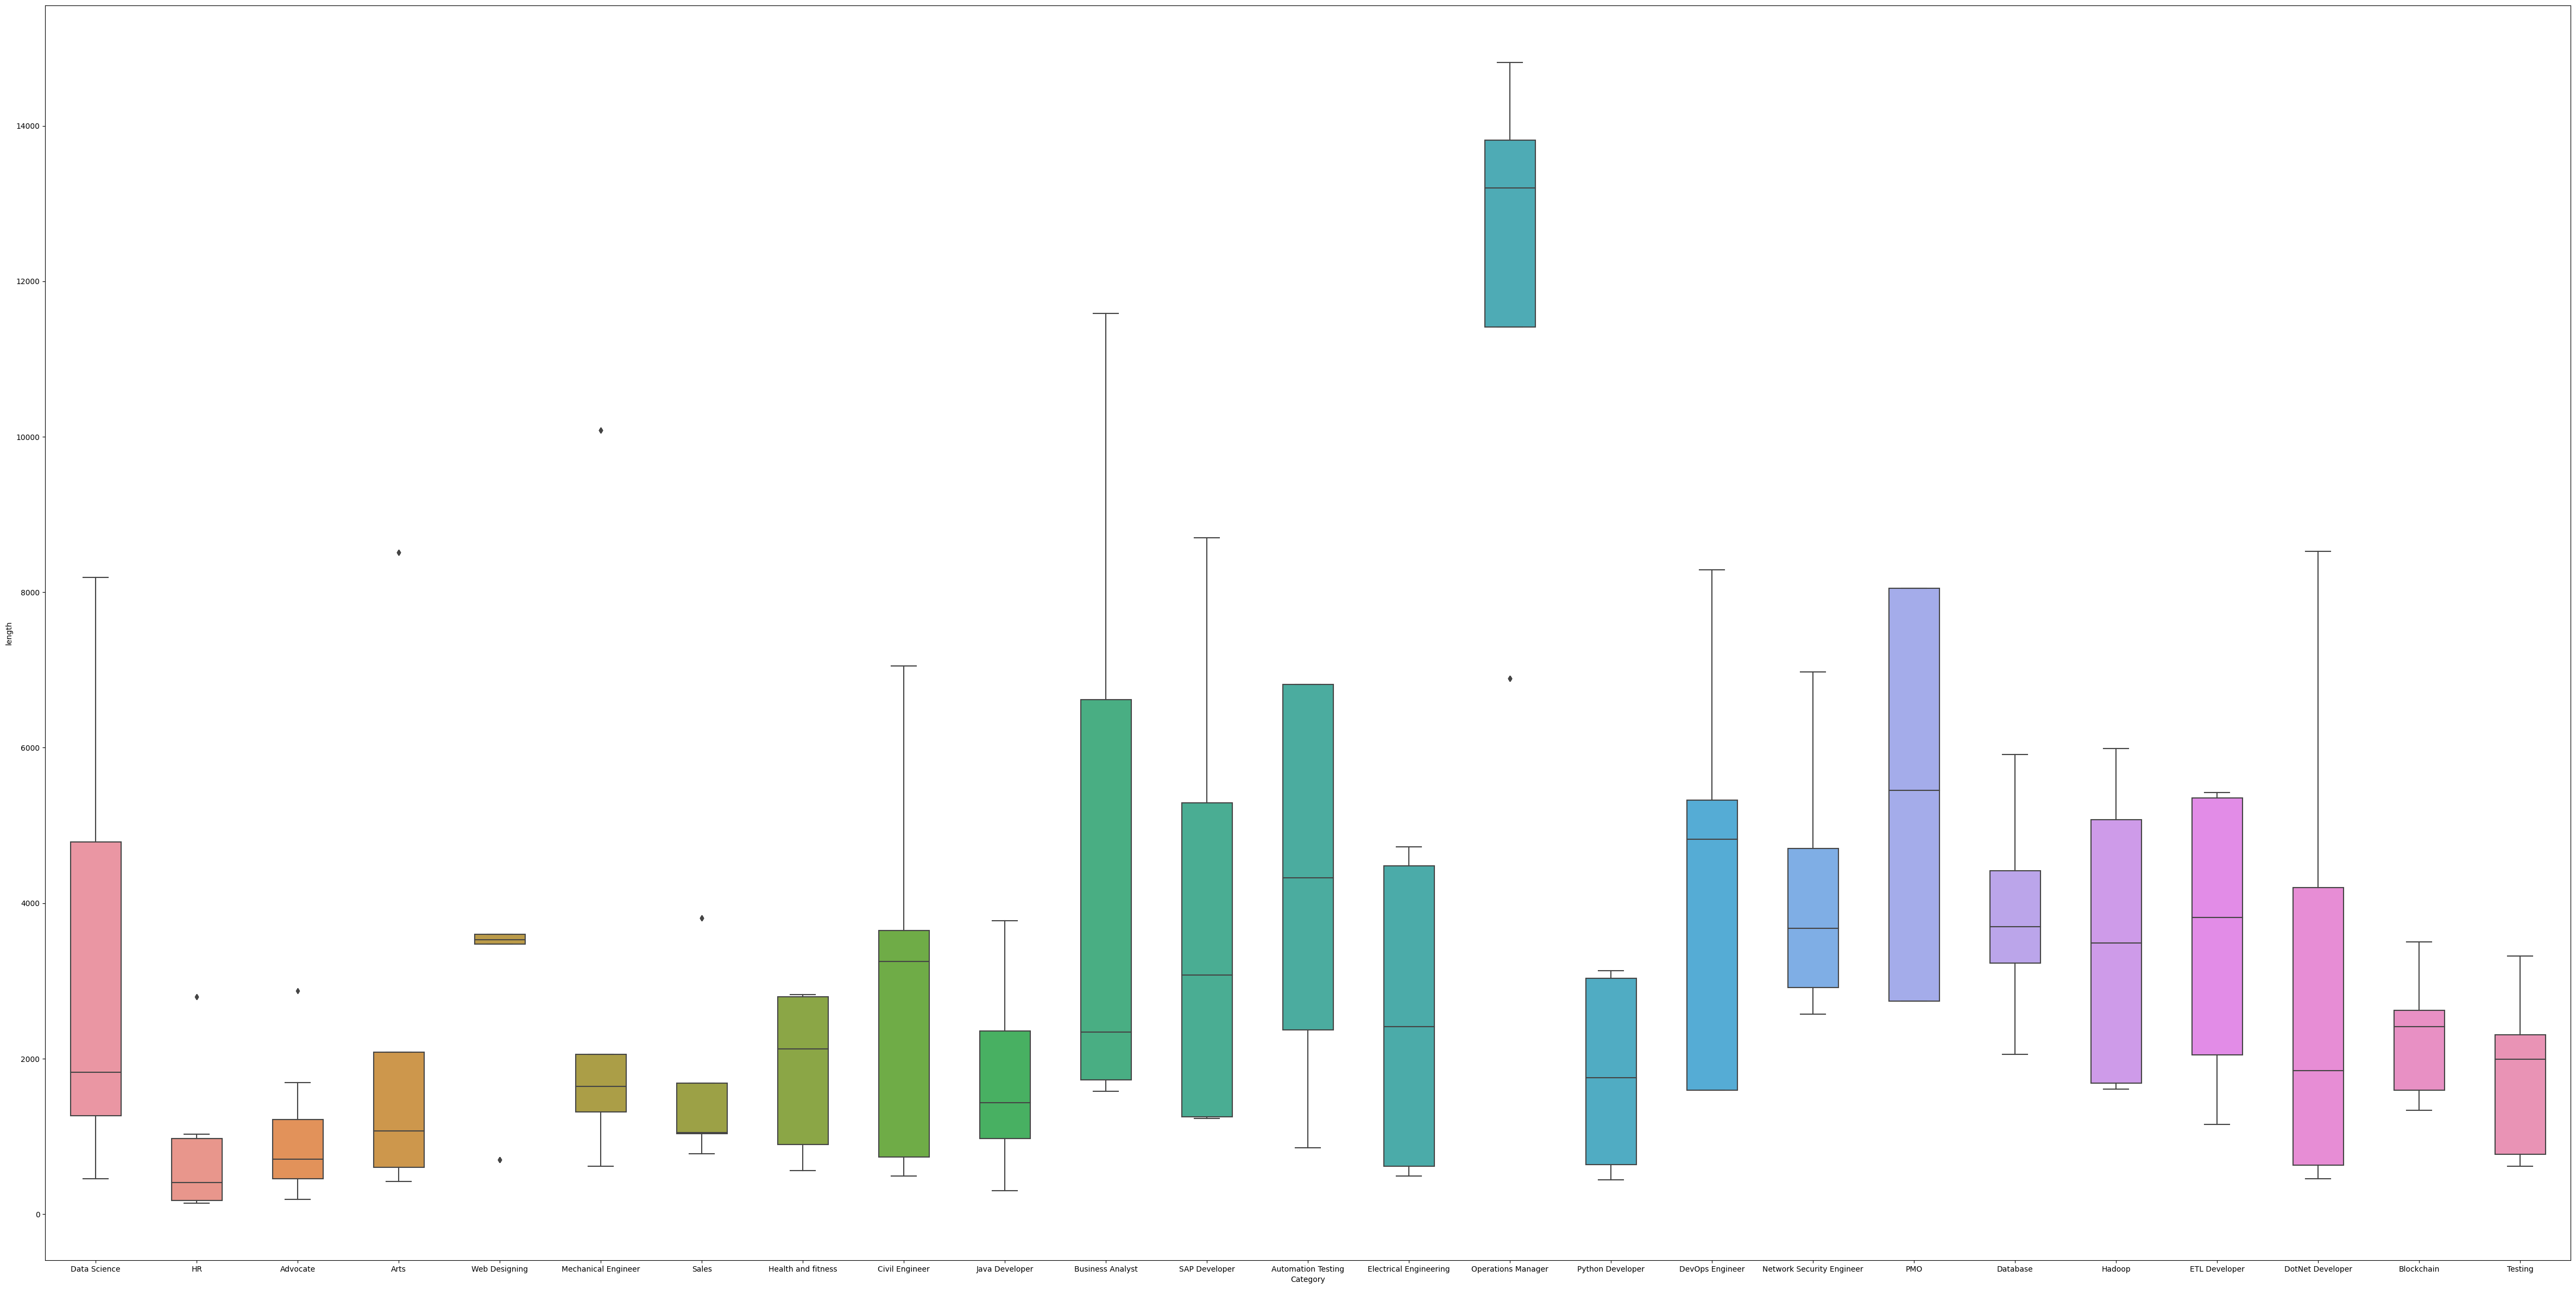

In [18]:
plt.figure(figsize=(60,30))
sns.boxplot(data=df, x='Category', y='length', width=.5);

### Displaying the distinct categories of resume and the number of records belonging to each category

In [19]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

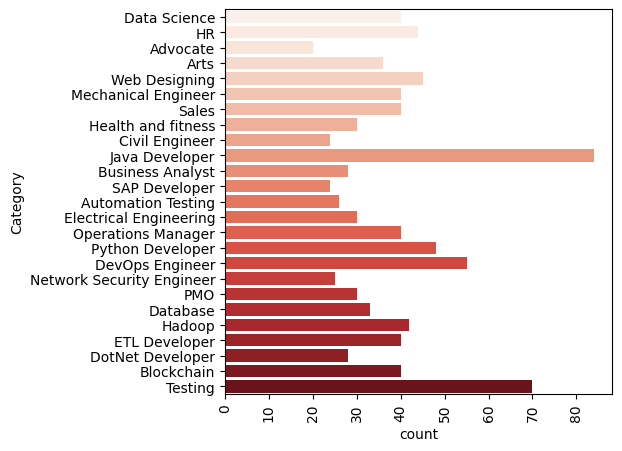

In [20]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df, palette='Reds')

In [21]:
df['Category'].value_counts()[:3].index

Index(['Java Developer', 'Testing', 'DevOps Engineer'], dtype='object')

### Visualizing most commonly used words in top 3 count Resumes

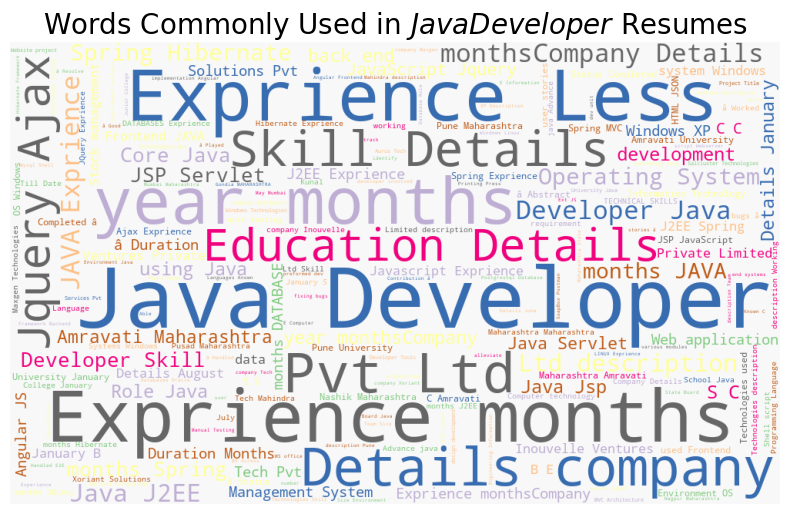

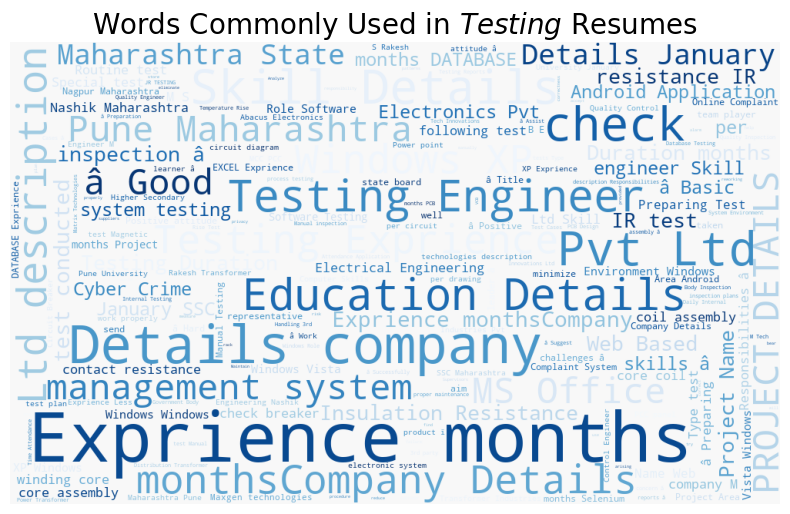

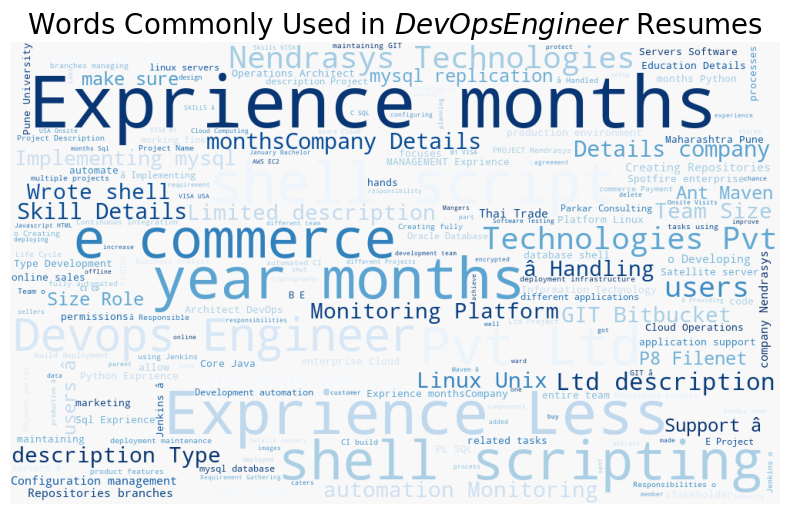

In [22]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = df['Category'].value_counts()[:3].index
for label, cmap in zip(top_jobs, a):
    text = df.query("Category == @label")["Resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Resumes", size=20)
    plt.show()

### Visualizing most commonly used words in top 3 lowest count Resumes

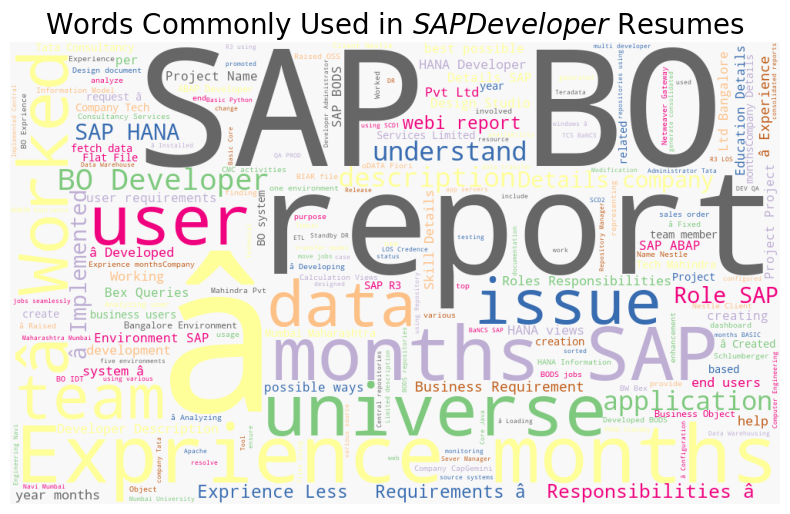

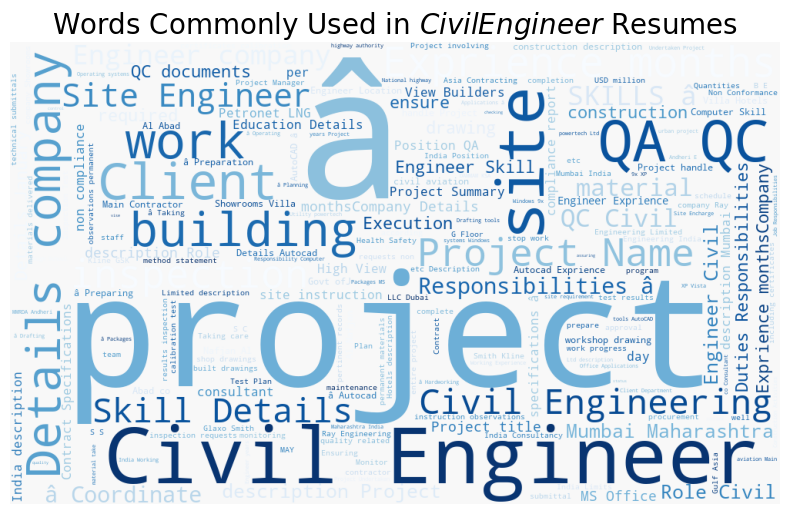

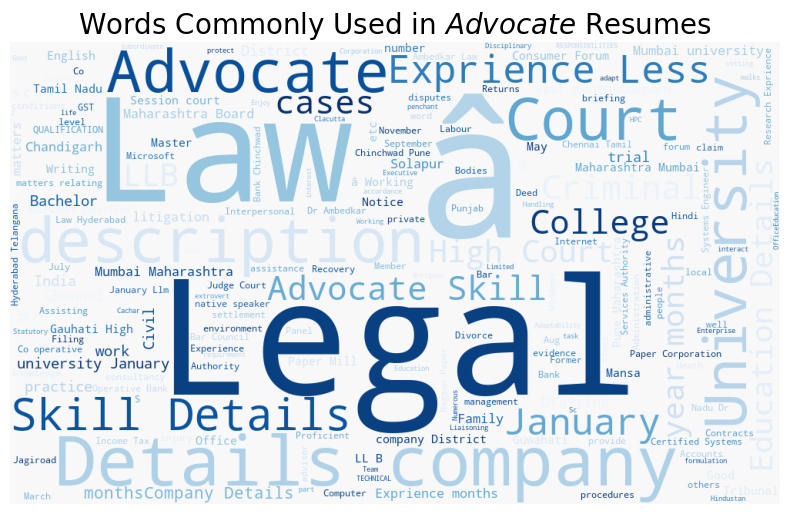

In [23]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = df['Category'].value_counts()[-3:].index
for label, cmap in zip(top_jobs, a):
    text = df.query("Category == @label")["Resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Resumes", size=20)
    plt.show()

##### Visiualizing the word cloud, we can see that there are frequent character like ( â ) which should be cleaned before traning our model.

# Tokenization

# POS Tagging

In [42]:
from nltk import pos_tag
from nltk import word_tokenize
text = "Stemming generates the base word from the inflected word by removing the affixes of the word. It has a set of pre-defined rules that govern the dropping of these affixes. It must be noted that stemmers might not always result in semantically meaningful base words.  Stemmers are faster and computationally less expensive than lemmatizers."
tokenized_text = word_tokenize(text)
tags = pos_tag(tokenized_text)
tags

LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger/averaged_perceptron_tagger.pickle[0m

  Searched in:
    - 'C:\\Users\\HP/nltk_data'
    - 'C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python310\\nltk_data'
    - 'C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python310\\share\\nltk_data'
    - 'C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python310\\lib\\nltk_data'
    - 'C:\\Users\\HP\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


# Stemming


In [44]:
from nltk.stem import PorterStemmer

# Create an object of class PorterStemmer
porter = PorterStemmer()

paragraph = "Stemming generates the base word from the inflected word by removing the affixes of the word. It has a set of pre-defined rules that govern the dropping of these affixes. It must be noted that stemmers might not always result in semantically meaningful base words. Stemmers are faster and computationally less expensive than lemmatizers."

# Tokenize the paragraph into individual words
words = paragraph.split()

# Apply stemming to each word and print the resulting stems
for word in words:
    stem = porter.stem(word)
    print(stem)


stem
gener
the
base
word
from
the
inflect
word
by
remov
the
affix
of
the
word.
it
ha
a
set
of
pre-defin
rule
that
govern
the
drop
of
these
affixes.
it
must
be
note
that
stemmer
might
not
alway
result
in
semant
meaning
base
words.
stemmer
are
faster
and
comput
less
expens
than
lemmatizers.


# Lemmatization

In [45]:
from nltk.stem import WordNetLemmatizer

# Create an object of class WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

paragraph = "Stemming generates the base word from the inflected word by removing the affixes of the word. It has a set of pre-defined rules that govern the dropping of these affixes. It must be noted that stemmers might not always result in semantically meaningful base words. Stemmers are faster and computationally less expensive than lemmatizers."

# Tokenize the paragraph into individual words
words = paragraph.split()

# Apply lemmatization to each word and print the resulting lemmas
for word in words:
    lemma = lemmatizer.lemmatize(word)
    print(lemma)


LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\HP/nltk_data'
    - 'C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python310\\nltk_data'
    - 'C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python310\\share\\nltk_data'
    - 'C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python310\\lib\\nltk_data'
    - 'C:\\Users\\HP\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


# Processing data

In [24]:
resumeDataSet = df.copy()
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()


Category                                             Resume  length  \
0  Data Science  Skills * Programming Languages: Python (pandas...    4786   
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...    1268   
2  Data Science  Areas of Interest Deep Learning, Control Syste...    1871   
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...    6995   
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...     452   

  cleaned_resume  
0                 
1                 
2                 
3                 
4

In [25]:
import re

def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

### Visualizing after cleaning Resumes

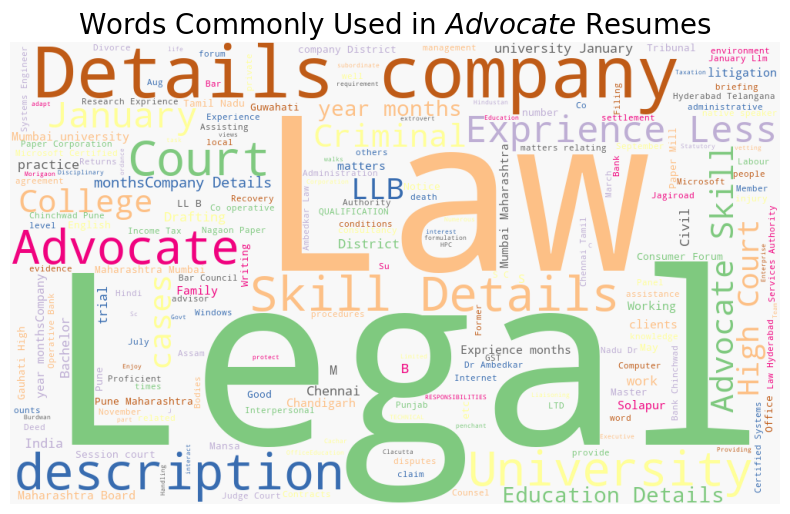

In [26]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
top_jobs = resumeDataSet['Category'].value_counts()[-1:].index
for label, cmap in zip(top_jobs, a):
    text = resumeDataSet.query("Category == @label")["cleaned_resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Resumes", size=20)
    plt.show()

### Encoding labels into different values 

In [27]:
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [28]:
resumeDataSet.head()

Category                                             Resume  length  \
0         6  Skills * Programming Languages: Python (pandas...    4786   
1         6  Education Details \r\nMay 2013 to May 2017 B.E...    1268   
2         6  Areas of Interest Deep Learning, Control Syste...    1871   
3         6  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...    6995   
4         6  Education Details \r\n MCA   YMCAUST,  Faridab...     452   

                                      cleaned_resume  
0  Skills Programming Languages Python pandas num...  
1  Education Details May 2013 to May 2017 B E UIT...  
2  Areas of Interest Deep Learning Control System...  
3  Skills R Python SAP HANA Tableau SAP HANA SQL ...  
4  Education Details MCA YMCAUST Faridabad Haryan...

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 1500)
(193, 1500)


In [30]:
clf = KNeighborsClassifier(n_neighbors=15)
clf = clf.fit(X_train, y_train)
yp = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.95
Accuracy of KNeighbors Classifier on test set: 0.94


In [31]:
class JobPredictor:
    def __init__(self) -> None:
        self.le = le
        self.word_vectorizer = word_vectorizer
        self.clf = clf

    def predict(self, resume):
        feature = self.word_vectorizer.transform([resume])
        predicted = self.clf.predict(feature)
        resume_position = self.le.inverse_transform(predicted)[0]
        return resume_position

    def predict_proba(self, resume):
        feature = self.word_vectorizer.transform([resume])
        predicted_prob = self.clf.predict_proba(feature)
        return predicted_prob[0]


In [32]:
job_description = """
Skills Required:


• Hands on years of working experience with ETL integration, Core JAVA, Spring Boot and APIs

• Good knowledge of DB2 or Azure SQL server (experience developing SQL queries)

• Understanding of File Transfer protocols and processes ie. FTP, SFTP, PGP Encryption

• Understanding mainframe integration for ETL processing

• Technical working experience with UNIX shell scripting

• Knowledge and understanding of Web Services

• Experience in developing ETL processes (preferably Talend, iWay, DataStage)

• Experience in writing/creating/updating technical documents

• Experience in batch job/process scheduling

• Familiarity with data integration and data streaming, WebSphere MQ and Communication Networks

• Familiarity with event driven programming concepts

• Exposure to Data Modelling and Data Architecture


Roles & Responsibilities:


• Act as an expert technical resource for problem analysis and solution implementation

• Work closely with Delivery and Technical Architecture teams, Product Owners and Technical Platform teams to design and develop high quality solutions supporting enterprise architecture and business process improvements that support our business and technical strategies

• Deal effectively with external Vendors, Business Partners, internal Stakeholders and Management

• Implement new systems or enhancements including, reviewing programs written by team members, establishing and supporting system test procedures, developing implementation plan, developing the required program and system documentation and ensuring all functionality has been delivered as required

• Provide post implementation support and training to the Production Support staff on the production processing functionality

• Support other development areas providing technical expertise, guidance, advice and knowledge transfer to staff and more junior Developers

• Coordinate and accommodate with a geographically dispersed team

• Pager rotation mandatory during critical processing times
"""

In [33]:
resume_position = JobPredictor().predict(job_description)
f'JD uploaded! Position: {resume_position}'

'JD uploaded! Position: ETL Developer'

## Cosine Similiarity

In [34]:
text_tokenizer= WhitespaceTokenizer()
remove_characters= str.maketrans("", "", "±§!@#$%^&*()-_=+[]}{;'\:,./<>?|")
cv = CountVectorizer()

resume_docx = docx2txt.process("C:\\Users\\HP\\Downloads\\Resume screener\\Resume screener\\ResumeDataset\\CV Data Engineer.docx")

#takes the texts in a list
text_docx= [resume_docx, job_description]
#creating the list of words from the word document
words_docx_list = text_tokenizer.tokenize(resume_docx)
#removing speacial charcters from the tokenized words 
words_docx_list=[s.translate(remove_characters) for s in words_docx_list]
#giving vectors to the words
count_docx = cv.fit_transform(text_docx)
#using the alogorithm, finding the match between the resume/cv and job description
similarity_score_docx = cosine_similarity(count_docx)
match_percentage_docx= round((similarity_score_docx[0][1]*100),2)
f'Match percentage with the Job description: {match_percentage_docx}'

'Match percentage with the Job description: 68.21'

In [35]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = match_percentage_docx,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Match with JD"}))

fig.show()

In [36]:
job_predictor = JobPredictor()
resume_position = job_predictor.predict(resume_docx)

chart_data = pd.DataFrame({
    "position": [cl for cl in job_predictor.le.classes_],
    "match": job_predictor.predict_proba(resume_docx)
})

fig = px.bar(chart_data, x="position", y="match",
                title=f'Resume matched to: {resume_position}')
fig.show()

### Multiple Resume Screener

In [37]:
uploaded_files = ["C:\\Users\\HP\\Downloads\\Resume screener\\Resume screener\\ResumeDataset\\CURRICULUM-VITAE DS.docx", 'C:\\Users\\HP\\Downloads\\Resume screener\\Resume screener\\ResumeDataset\\CURRICULUM-VITAE-FSD.docx', 'C:\\Users\\HP\\Downloads\\Resume screener\\Resume screener\\ResumeDataset\\CV Data Engineer.docx', 'C:\\Users\\HP\\Downloads\\Resume screener\\Resume screener\\ResumeDataset\\QA resume.docx', "C:\\Users\\HP\\Downloads\\Resume screener\\Resume screener\\ResumeDataset\\resume.docx"]
job_predictor = JobPredictor()
job_positions = {x: 0 for x in [cl for cl in job_predictor.le.classes_]}
match_percentage = {}
for uploaded_file in uploaded_files:
    resume_docx = docx2txt.process(uploaded_file)
    resume_position = job_predictor.predict(resume_docx)
    job_positions[resume_position] += 1

#     job_description= docx2txt.process("temp_jd.docx")
    text_docx= [resume_docx, job_description]
    words_docx_list = text_tokenizer.tokenize(resume_docx)
    words_docx_list=[s.translate(remove_characters) for s in words_docx_list]
    count_docx = cv.fit_transform(text_docx)
    similarity_score_docx = cosine_similarity(count_docx)
    match_percentage_docx= round((similarity_score_docx[0][1]*100),2)
    match_percentage[uploaded_file.split('/')[-1]] = match_percentage_docx


In [38]:
match_chart_data = pd.DataFrame({
    "document": match_percentage.keys(),
    "percentage": match_percentage.values()
})

fig = px.bar(match_chart_data, x="document", y="percentage", title='Document Matched Percentage')
fig.show()

In [39]:
resume_position = job_predictor.predict(job_description)
total_matched = job_positions[resume_position]
total_files = len(uploaded_files)

print(f'Position of the Job description: {resume_position}')

fig = go.Figure(go.Indicator(
    mode = "delta+number",
    # gauge = {'axis': {'visible': False}},
    delta = {'reference': len(uploaded_files)},
    value = total_matched,
    domain = {'row': 0, 'column': 0},
    title = {'text': f"{total_matched} out of {len(uploaded_files)} Resume falls on same category of JD."}))

fig.show()

Position of the Job description: ETL Developer


In [40]:
df = pd.DataFrame({
    'names': ['Matched', 'Unmatched'], 
    'values': [total_matched, total_files]
})
fig = px.pie(df, values='values', names='names')
fig.show()

chart_data = pd.DataFrame({
    "position": job_positions.keys(),
    "match": job_positions.values()
})

fig = px.bar(chart_data, x="position", y="match", title=f'Resume Job Position distribution')
fig.show()

# End